# Problem
Calculating Conversion Rate Based on Email Sent, Open Rate and Click Rate

# Logistic Regression

In [1]:
pwd

'C:\\Users\\User\\Git-Hup Files\\Machine Learning Classification'

In [2]:
cd C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing

C:\Users\User\Desktop\Anindita Mitra\Machine Learning\Email Marketing


In [3]:
#Import all the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import Data set from the local directory

df = pd.read_csv("EmailClassification.csv")

In [5]:
df.head(10)

,Email_ID,Month,Email_Sent,Open_Rate,Click_Rate,Conversion_Rate
0,EMA00081000168000,Jan,873,42,14,0
1,EMA00081000187610,Feb,630,32,26,1
2,EMA00081000244770,Mar,988,21,8,0
3,EMA00081000245260,Apr,339,25,9,0
4,EMA00081000264690,May,1157,30,31,1
5,EMA00081000337110,Jun,1157,25,31,1
6,EMA00081000390580,Jul,962,78,27,0
7,EMA00081000445960,Jan,578,17,11,0
8,EMA00081000581770,Feb,1173,33,21,1
9,EMA00081000587870,Mar,1173,23,2,0


In [6]:
#defining X and Y
x = df.iloc[:,2:-1]
y= df.iloc[:, -1]

In [7]:
x.head(10)

,Email_Sent,Open_Rate,Click_Rate
0,873,42,14
1,630,32,26
2,988,21,8
3,339,25,9
4,1157,30,31
5,1157,25,31
6,962,78,27
7,578,17,11
8,1173,33,21
9,1173,23,2


In [8]:
# Splitting data into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x , y, test_size=0.2, random_state=0)

In [9]:
#Training the model using Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#PREDICT NEW RESULT
#Sample 1
#Here 339 is Email Sent | 25 is OpenRate and 9 is click Rate
print(classifier.predict([[339,25,9]]))

[0]


In [11]:
#Sample 2 (random number choosen)
print(classifier.predict([[1025,92,50]]))

[1]


In [12]:
# Predicting Real Test Set
y_pred = classifier.predict(x_test)

In [13]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

# Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model  <br/>

true positives (TP): These are cases in which we predicted yes for converion , and for actual also conversion did happen.<br/>
true negatives (TN): We predicted no- Conversion , and in reality there is no conversion.<br/>
false positives (FP): We predicted yes for Conversion, but they don't actually there were no conversion. (Also known as a "Type I error.")<br/>
false negatives (FN): We predicted no conversion , but they actually there was a conversion. (Also known as a "Type II error.")<br/>

In [14]:
# No of correct and incorrt prdection
from sklearn.metrics import confusion_matrix, accuracy_score

[[30  0]
 [ 7  3]]


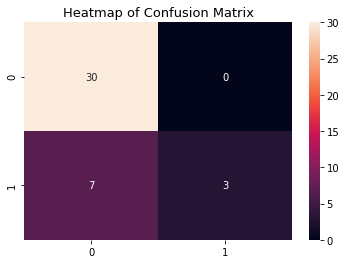

In [15]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.title('Heatmap of Confusion Matrix', fontsize=13)
sns.heatmap(cm, annot=True)
plt.show()
#30 : correct prediction : no conversion (0)
#3 : Correct Prediction : yes conversion (1)
#0 : Incorrect Prediction : yes conversion (1)
#7 : Incorrect Prediction : n0 conversion(0)

In [16]:
#.82 % is the corrt prediction
accuracy_score(y_test, y_pred) 

0.825

# Classification Report

A classification matrix sorts all cases from the model into categories, by determining whether the predicted value matched the actual value. All the cases in each category are then counted, and the totals are displayed in the matrix. The classification matrix is a standard tool for evaluation of statistical models and is sometimes referred to as a confusion matrix.

In [17]:
#Prediction and Evaluation
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        30
           1       1.00      0.30      0.46        10

    accuracy                           0.82        40
   macro avg       0.91      0.65      0.68        40
weighted avg       0.86      0.82      0.79        40



NO    YES - PREDICTED VALUES<br/>
NO     [30 (TN)  0(FP)]<br/>
YES    [1 (FN)  3(TP)]<br/>
Actual

2-TURE NEGATIVE (A-Y;P-Y(TN))----> TYPE 2 ERROR <br/>
0-False Negative (A-Y; P-N  FN)) --> TYPE 1 ERROR<br/>
1-FALSE POSITIVE (A: N; P-Y (FP))<br/>
3-TRUE POSTIVE(A-Y;P-Y (TP))<br/>

TOTAL SAMPLE = 30+0(N)/ 7+3 (D) 
ACCURACY = (TP+TN)/TOTAL 30+3/40 = .825<br/>
ERROR RATE = 1-ACCURACY (1-.825)=.17 (FP+FN)/TOTAL<br/>
PRECISION = TP/PREDICTED YES = 3/3(0+3) =1 (% of predicted resut)<br/>
RECALL = TP/ACTUAL YES = 3/10(7+3) = .3 (% of actual resut)<br/>

# CROSS VALIDATION

Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("accuracies: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

accuracies: 80.50 %
Standard Deviation: 5.89 %
